In [0]:
# import packages.
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Dataset: [Dog_vs_Cat](https://www.kaggle.com/c/dogs-vs-cats/data)


In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

# Data preparation
1. Read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensors.
4. Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.



In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [34]:
# ImageDataGenerator:
#   Keras method, it can read images from disk and preprocess them into proper 
#   tensors. It will also set up generators that convert these images into batches
#   of tensors-helpful when training the network.
train_image_generator = ImageDataGenerator(rescale=1./255)
# -> Generator for training data
validation_image_generator = ImageDataGenerator(rescale=1./255)
# -> Generator for validation data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Visualize training imgaes

Extract a batch of images from the training generator, which is 128 images in this example, then plot some of them.

(Visualize the training images by extracting a batch of images from the training generator—which is 32 images in this example—then plot five of them with matplotlib.)

Tutorial写的是32images。?不应该是128个吗？batch_size = 128？测试了一下是128，应该是官方Tutorial的笔误。

In [35]:
sample_train_images, sample_train_labels = next(train_data_gen)
len(sample_train_images)

128

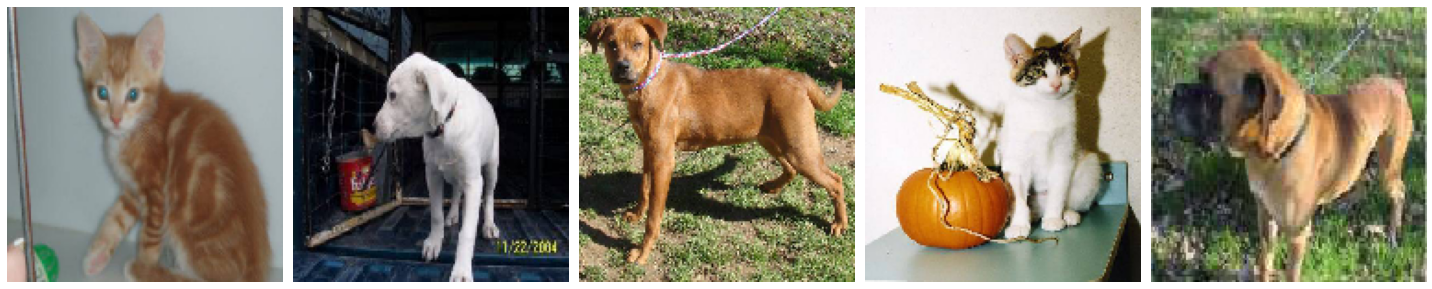

In [36]:
# image plot function
def plotImages(images_array):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_array, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_train_images[:5])

# Model Construct

This model consists of three convolution blocks with a max pool layer in each of them. Then fully connected layer with 512 units on top of it that is activated by a 'relu' activation function.

In [0]:
# model construct
model = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
model.summary()

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val
)

In [38]:
# training
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 48s 3s/step - loss: 0.7590 - accuracy: 0.5000 - val_loss: 0.6877 - val_accuracy: 0.5078
Epoch 2/15
15/15 [==============================] - 48s 3s/step - loss: 0.6712 - accuracy: 0.5144 - val_loss: 0.6420 - val_accuracy: 0.6228
Epoch 3/15
15/15 [==============================] - 48s 3s/step - loss: 0.6187 - accuracy: 0.6346 - val_loss: 0.6580 - val_accuracy: 0.5536
Epoch 4/15
15/15 [==============================] - 48s 3s/step - loss: 0.6010 - accuracy: 0.6490 - val_loss: 0.5810 - val_accuracy: 0.6886
Epoch 5/15
15/15 [==============================] - 48s 3s/step - loss: 0.5389 - accuracy: 0.7035 - val_loss: 0.5633 - val_accuracy: 0.7344
Epoch 6/15
15/15 [==============================] - 48s 3s/step - loss: 0.4905 - accuracy: 0.7420 - val_loss: 0.5491 - val_accuracy: 0.7121
Epoch 7/15
15/15 [==============================] - 48s 3s/step - loss: 0.4283 - accuracy: 0.7911 - val_loss: 0.5414 - val_accuracy: 0.7478
Epoch 8/15
15/15 [==

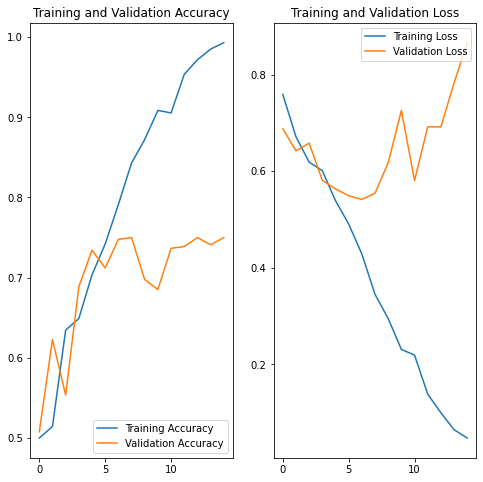

In [39]:
# result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()